In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('dataset/dataset-ru.csv')
df.head()

,comment,toxicity
0,я сегодня проезжала по рабочей и между домами ...,0
1,очередной лохотрон. зачем придумывать очередно...,0
2,"ретро дежавю ... сложно понять чужое сердце , ...",0
3,а когда мы статус агрогородка получили?,0
4,2 августа поздно вечером нашли вот такую потер...,0


In [3]:
print(df['comment'].describe())

count     262695
unique    262497
top        #ИМЯ?
freq          60
Name: comment, dtype: object


In [4]:
print(df['toxicity'].value_counts())

toxicity
0    213266
1     49429
Name: count, dtype: int64


In [8]:
213266 + 49429

262695

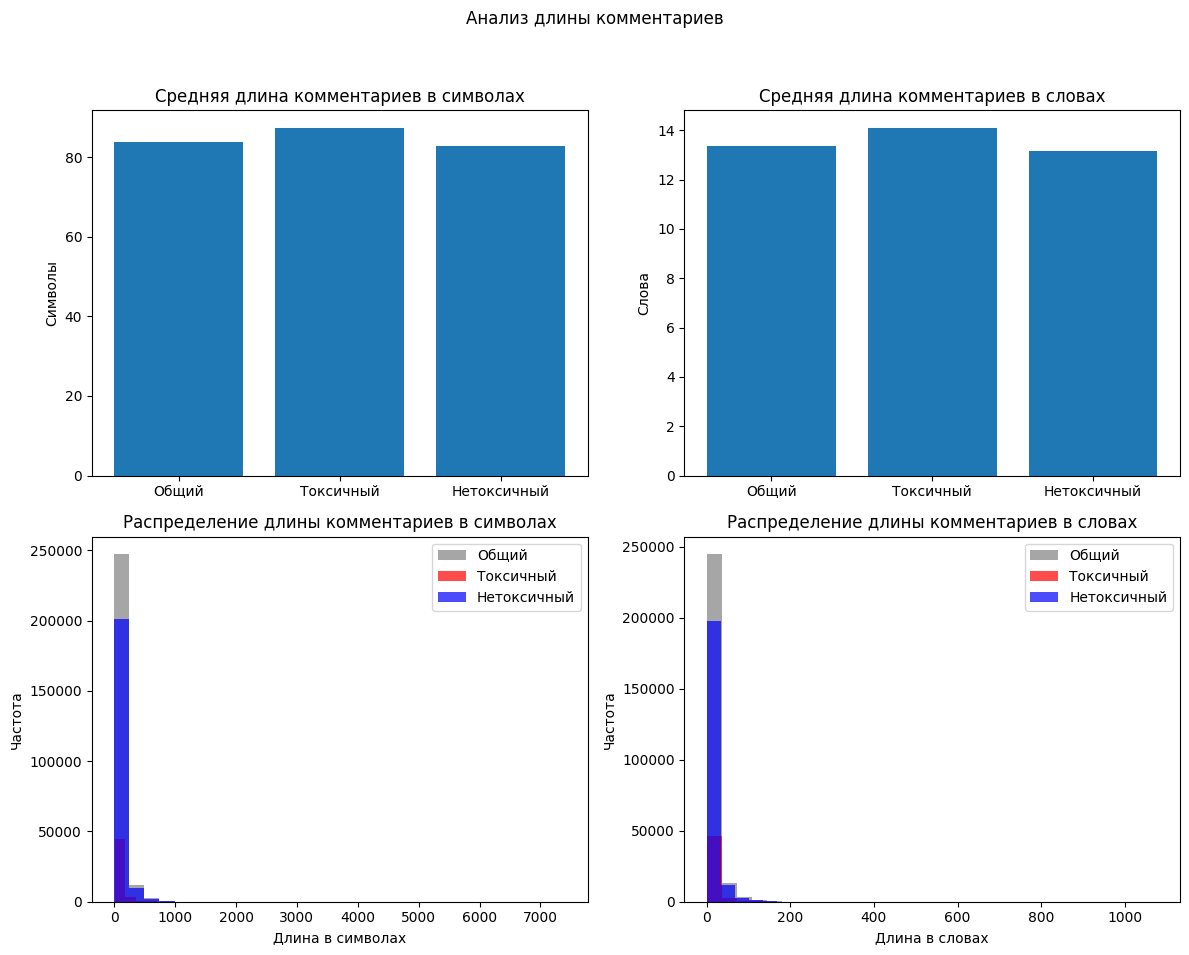

In [5]:
df['length_chars'] = df['comment'].apply(len)
df['length_words'] = df['comment'].apply(lambda x: len(x.split()))

# Общий анализ
general_stats_chars = df['length_chars'].agg(['min', 'max', 'mean'])
general_stats_words = df['length_words'].agg(['min', 'max', 'mean'])

# Анализ для токсичных комментариев
toxic_stats_chars = df[df['toxicity'] == 1]['length_chars'].agg(['min', 'max', 'mean'])
toxic_stats_words = df[df['toxicity'] == 1]['length_words'].agg(['min', 'max', 'mean'])

# Анализ для нетоксичных комментариев
nontoxic_stats_chars = df[df['toxicity'] == 0]['length_chars'].agg(['min', 'max', 'mean'])
nontoxic_stats_words = df[df['toxicity'] == 0]['length_words'].agg(['min', 'max', 'mean'])

# Визуализация результатов
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Анализ длины комментариев')

# График длины в символах
ax[0, 0].bar(['Общий', 'Токсичный', 'Нетоксичный'], [general_stats_chars['mean'], toxic_stats_chars['mean'], nontoxic_stats_chars['mean']])
ax[0, 0].set_title('Средняя длина комментариев в символах')
ax[0, 0].set_ylabel('Символы')

# График длины в словах
ax[0, 1].bar(['Общий', 'Токсичный', 'Нетоксичный'], [general_stats_words['mean'], toxic_stats_words['mean'], nontoxic_stats_words['mean']])
ax[0, 1].set_title('Средняя длина комментариев в словах')
ax[0, 1].set_ylabel('Слова')

# Гистограммы для детального распределения
ax[1, 0].hist(df['length_chars'], bins=30, color='gray', alpha=0.7, label='Общий')
ax[1, 0].hist(df[df['toxicity'] == 1]['length_chars'], bins=30, color='red', alpha=0.7, label='Токсичный')
ax[1, 0].hist(df[df['toxicity'] == 0]['length_chars'], bins=30, color='blue', alpha=0.7, label='Нетоксичный')
ax[1, 0].set_title('Распределение длины комментариев в символах')
ax[1, 0].set_xlabel('Длина в символах')
ax[1, 0].set_ylabel('Частота')
ax[1, 0].legend()

ax[1, 1].hist(df['length_words'], bins=30, color='gray', alpha=0.7, label='Общий')
ax[1, 1].hist(df[df['toxicity'] == 1]['length_words'], bins=30, color='red', alpha=0.7, label='Токсичный')
ax[1, 1].hist(df[df['toxicity'] == 0]['length_words'], bins=30, color='blue', alpha=0.7, label='Нетоксичный')
ax[1, 1].set_title('Распределение длины комментариев в словах')
ax[1, 1].set_xlabel('Длина в словах')
ax[1, 1].set_ylabel('Частота')
ax[1, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

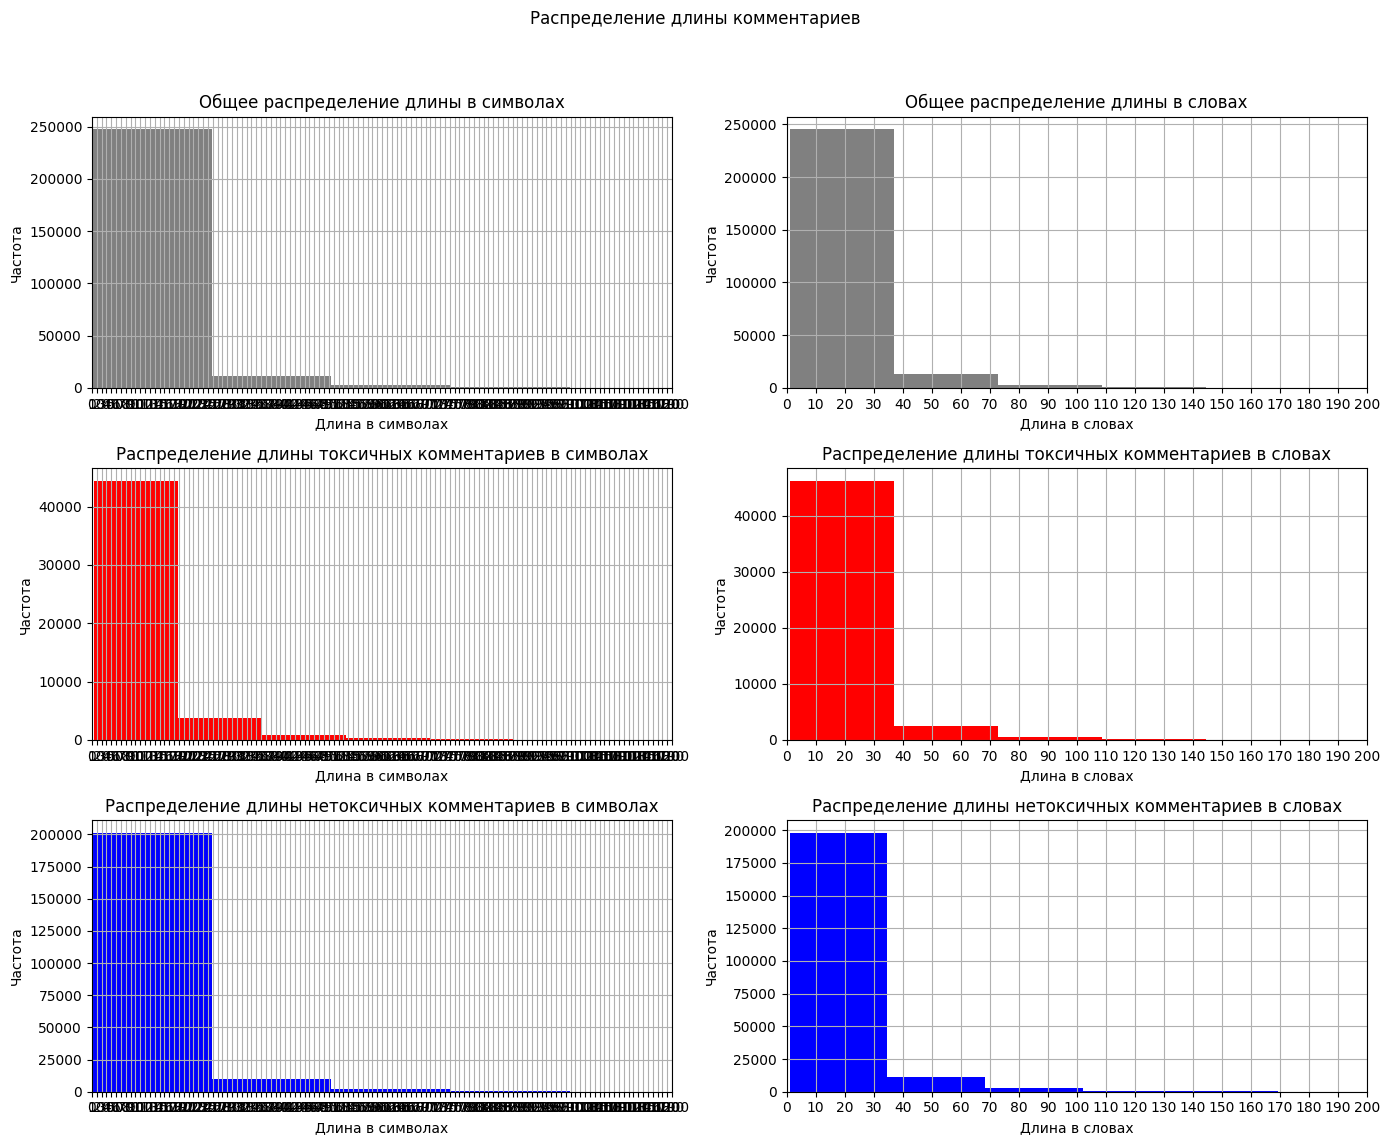

In [13]:
df['length_chars'] = df['comment'].apply(len)
df['length_words'] = df['comment'].apply(lambda x: len(x.split()))

# Создание графиков
fig, axes = plt.subplots(3, 2, figsize=(14, 12))  # 3 строки (общий, токсичный, нетоксичный) и 2 колонки (символы, слова)
fig.suptitle('Распределение длины комментариев')

# Гистограммы для длины в символах
axes[0, 0].hist(df['length_chars'], bins=30, color='gray')
axes[0, 0].set_title('Общее распределение длины в символах')
axes[0, 0].set_xlabel('Длина в символах')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].set_xlim(0, 1200)
axes[0, 0].grid(True)
axes[0, 0].set_xticks(range(0, 1201, 10))

axes[1, 0].hist(df[df['toxicity'] == 1]['length_chars'], bins=30, color='red')
axes[1, 0].set_title('Распределение длины токсичных комментариев в символах')
axes[1, 0].set_xlabel('Длина в символах')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].set_xlim(0, 1200)
axes[1, 0].grid(True)
axes[1, 0].set_xticks(range(0, 1201, 10))

axes[2, 0].hist(df[df['toxicity'] == 0]['length_chars'], bins=30, color='blue')
axes[2, 0].set_title('Распределение длины нетоксичных комментариев в символах')
axes[2, 0].set_xlabel('Длина в символах')
axes[2, 0].set_ylabel('Частота')
axes[2, 0].set_xlim(0, 1200)
axes[2, 0].grid(True)
axes[2, 0].set_xticks(range(0, 1201, 10))

# Гистограммы для длины в словах
axes[0, 1].hist(df['length_words'], bins=30, color='gray')
axes[0, 1].set_title('Общее распределение длины в словах')
axes[0, 1].set_xlabel('Длина в словах')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].set_xlim(0, 200)
axes[0, 1].grid(True)
axes[0, 1].set_xticks(range(0, 201, 10))

axes[1, 1].hist(df[df['toxicity'] == 1]['length_words'], bins=30, color='red')
axes[1, 1].set_title('Распределение длины токсичных комментариев в словах')
axes[1, 1].set_xlabel('Длина в словах')
axes[1, 1].set_ylabel('Частота')
axes[1, 1].set_xlim(0, 200)
axes[1, 1].grid(True)
axes[1, 1].set_xticks(range(0, 201, 10))

axes[2, 1].hist(df[df['toxicity'] == 0]['length_words'], bins=30, color='blue')
axes[2, 1].set_title('Распределение длины нетоксичных комментариев в словах')
axes[2, 1].set_xlabel('Длина в словах')
axes[2, 1].set_ylabel('Частота')
axes[2, 1].set_xlim(0, 200)
axes[2, 1].grid(True)
axes[2, 1].set_xticks(range(0, 201, 10))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [10]:
df['length_chars'] = df['comment'].apply(len)
df['length_words'] = df['comment'].apply(lambda x: len(x.split()))

In [11]:
def calculate_stats(column):
    general_stats = df[column].agg(['min', 'max', 'mean']).rename('All Comments')
    toxic_stats = df[df['toxicity'] == 1][column].agg(['min', 'max', 'mean']).rename('Toxic Comments')
    nontoxic_stats = df[df['toxicity'] == 0][column].agg(['min', 'max', 'mean']).rename('Non-Toxic Comments')
    stats_df = pd.concat([general_stats, toxic_stats, nontoxic_stats], axis=1)
    return stats_df

In [12]:
stats_chars = calculate_stats('length_chars')
print("Статистики по символам:")
print(stats_chars)

# Расчет статистик по словам
stats_words = calculate_stats('length_words')
print("\nСтатистики по словам:")
print(stats_words)

Статистики по символам:
      All Comments  Toxic Comments  Non-Toxic Comments
min       2.000000        4.000000            2.000000
max    7404.000000     5218.000000         7404.000000
mean     83.691692       87.403609           82.831375

Статистики по словам:
      All Comments  Toxic Comments  Non-Toxic Comments
min       1.000000        1.000000            1.000000
max    1078.000000     1078.000000         1012.000000
mean     13.345218       14.105869           13.168921
